<a href="https://colab.research.google.com/github/Jakobs-Ben/PT309/blob/main/spectrum%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

627.46 627.96


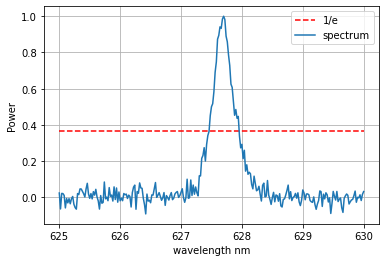

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import e

def Gau(x, height, mu, sigma):
    '''
    Define a Gaussian function
    '''
    return height*np.exp(-(x-mu)**2/(2*sigma**2))

df = pd.read_csv('spectrum.csv')

x = df['wavelength']
y = df['amplitude']

x = x[250:501]
y = y[250:501]

y_max = np.abs(y.max())

for i in range(len(y)):
  y[i+250] = y[i+250]/y_max

find_val = []

for i in range(130):
  find_val.append(np.abs(y[i+250] - 1/e))

index = find_val.index(min(np.abs(find_val)))

LHS_x = x[250+index]
LHS_y = y[250+index]

#plt.plot(LHS_x, LHS_y, 'bo')

find_val=[]

for i in range(120):
  find_val.append(np.abs(y[i+380] - 1/e))

index = find_val.index(min(np.abs(find_val)))

RHS_x = x[380+index]
RHS_y = y[380+index]

#plt.plot(RHS_x, RHS_y, 'bo', label='intersection with 1/e')
#plt.plot(x[380], y[380], 'bo')
#p_init=np.array([1e-5, 15, 1])
#popt, pcov = curve_fit(Gau, x, y, p_init) # fits data
#plt.plot(x, Gau(x, popt[0], popt[1], popt[2]), 'r', label='Fit')

X = [625, 630]
Y = [1/e,1/e]

plt.plot(X,Y, 'r--', label='1/e')

plt.plot(x,y, label='spectrum')
plt.xlabel('wavelength nm')
plt.ylabel('Power')
plt.grid()
plt.legend()

print(LHS_x, RHS_x)